In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.externals import joblib
from TrainTestSplit import trainTestSplit
from sklearn.naive_bayes import GaussianNB

'------------------------------------------------- Initial Setup -------------------------------------------------'

%matplotlib inline
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from collections import OrderedDict
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.metrics import confusion_matrix
from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import classification_report
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score

np.set_printoptions(precision = 2)

In [11]:
## Loading in the data of Set B.
XTrain, XTest, YTrain, YTest = trainTestSplit("B")

In [12]:
## Setting the classifier to be Vanilla Linear SVM.
Classifier = SVC(kernel = 'linear')

## Defining a list to store the Cross-Validation Scores.
crossValidationScores = []

## Computing the 10-fold cross-validation score.
cvScore = cross_val_score(Classifier, XTrain, YTrain['FTR'], cv = 10)
crossValidationScores.append(np.mean(cvScore))
print "Cross Validation Score : ", np.mean(crossValidationScores)

## Computing the Training and Testing Accuracies.
Classifier.fit(XTrain,YTrain)
print "Training Accuracy : ", Classifier.score(XTrain, YTrain)
print "Testing Accuracy : ", Classifier.score(XTest, YTest)

Cross Validation Score :  0.535438012766
Training Accuracy :  0.534605525491
Testing Accuracy :  0.578125


In [13]:
parameters = { 'C' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
               'gamma' : [0.01, 0.02, 0.03, 0.04, 0.05, 0.10, 0.20, 0.30, 0.40, 0.50]
              }

Clf = joblib.load('./GridSearchObjects/LSVMSetBCP1.pkl')

In [14]:
## Clf = GridSearchCV(Classifier, parameters, n_jobs = 5, verbose = 4, scoring = 'accuracy')

## ## Fitting the Model to the Training Data.
## Clf.fit(XTrain, YTrain.values.ravel())

In [15]:
## Printing the statistics after hyper-parameter tuning.
print Clf.best_score_
print Clf.best_estimator_

0.535175163771
SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.01, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [16]:
## Setting the classifier to be the hyperparameter tuned Linear SVM.
Classifier = Clf.best_estimator_

## Defining a list to store the Cross-Validation Scores.
crossValidationScores = []

## Computing the 10-fold cross-validation score.
cvScore = cross_val_score(Classifier, XTrain, YTrain['FTR'], cv = 10)
crossValidationScores.append(np.mean(cvScore))
print "Cross Validation Score : ", np.mean(crossValidationScores)

## Computing the Training and Testing Accuracies.
Classifier.fit(XTrain,YTrain)
print "Training Accuracy : ", Classifier.score(XTrain, YTrain)
print "Testing Accuracy : ", Classifier.score(XTest, YTest)

Cross Validation Score :  0.535723727052
Training Accuracy :  0.534890344631
Testing Accuracy :  0.578125


In [17]:
## Using Recursive Feature Elimination for performing feature selection.
Rfe = RFE(Classifier, n_features_to_select = 1, step = 1)
Rfe.fit(XTrain,YTrain)
Rankings = Rfe.ranking_

## Creating a list of features .
Features = list(XTrain.columns.values)

## Creating a dictionary to map the variable name to their RFE rankings .
RFERanks = {}

for i in range(0,len(Features)):
     RFERanks[Features[i]] = Rankings[i]
        
RFERanks = OrderedDict(sorted(RFERanks.items(), reverse = False, key = lambda t: t[1]))
pprint(RFERanks)

OrderedDict([('GD', 1), ('Form', 2), ('WeightedStreak', 3), ('STKPP', 4), ('Streak', 5), ('GKPP', 6), ('Midfield', 7), ('CKPP', 8), ('Overall', 9), ('Defense', 10), ('Attack', 11)])


In [18]:
## Remove the less relevant features and only keep the top ones.
removeFeatures = []

for key, value in RFERanks.iteritems():
        if (value >= 8):
            removeFeatures.append(key)

XTrain.drop(removeFeatures, axis = 1, inplace = True)
XTest.drop(removeFeatures, axis = 1, inplace = True)

In [19]:
parameters = { 'C' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
               'gamma' : [0.01, 0.02, 0.03, 0.04, 0.05, 0.10, 0.20, 0.30, 0.40, 0.50]
              }

Clf = joblib.load('./GridSearchObjects/LSVMSetBCP2.pkl')

In [20]:
## Clf = GridSearchCV(Classifier, parameters, n_jobs = 5, verbose = 4, scoring = 'accuracy')

## ## Fitting the Model to the Training Data.
## Clf.fit(XTrain, YTrain.values.ravel())

In [21]:
## Printing the statistics after hyper-parameter tuning.
print Clf.best_score_
print Clf.best_estimator_

0.535175163771
SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.01, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [22]:
## Setting the classifier to be the hyperparameter tuned Linear SVM.
Classifier = Clf.best_estimator_

## Defining a list to store the Cross-Validation Scores.
crossValidationScores = []

## Computing the 10-fold cross-validation score.
cvScore = cross_val_score(Classifier, XTrain, YTrain['FTR'], cv = 10)
crossValidationScores.append(np.mean(cvScore))
print "Cross Validation Score : ", np.mean(crossValidationScores)

## Computing the Training and Testing Accuracies.
Classifier.fit(XTrain,YTrain)
print "Training Accuracy : ", Classifier.score(XTrain, YTrain)
print "Testing Accuracy : ", Classifier.score(XTest, YTest)

Cross Validation Score :  0.532023233141
Training Accuracy :  0.532611791512
Testing Accuracy :  0.571875


In [23]:
## Obtaining our predictions made by the best Linear SVM Classifier .
YPred = Classifier.predict(XTest)

## Defining the target classes .
classLabels = ['H','A','D']

## Obtaining the confusion matrix for our predictions .
confusionMatrix = confusion_matrix(YTest['FTR'], YPred, classLabels)
confusionMatrix

array([[272,  36,   0],
       [ 80,  94,   0],
       [129,  29,   0]])

In [24]:
## Obtaining a more readable format of our Confusion Matrix in terms of a Classification Report . 
classificationReport = classification_report(YTest, YPred, classLabels)
print classificationReport

             precision    recall  f1-score   support

          H       0.57      0.88      0.69       308
          A       0.59      0.54      0.56       174
          D       0.00      0.00      0.00       158

avg / total       0.43      0.57      0.49       640



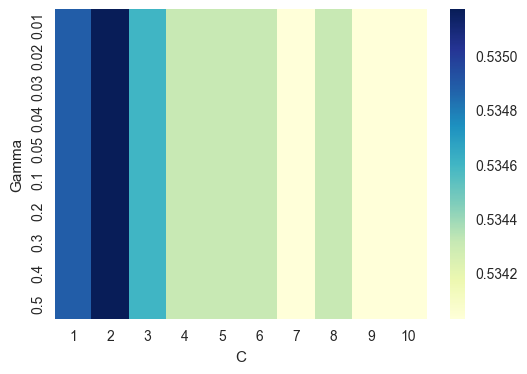

In [27]:
gridScores = Clf.grid_scores_

gridScoresList = []

for i in range(0, len(gridScores)):

    Score = (gridScores[i][1],)
    C = (gridScores[i][0]['C'],)
    Gamma = (gridScores[i][0]['gamma'],)

    Tuple = Score + C + Gamma
    gridScoresList.append(Tuple)
    
df = pd.DataFrame(gridScoresList, columns = ['Validation Score', 'C', 'Gamma'])

grid_map = df.pivot("Gamma", "C", "Validation Score")
sns.heatmap(grid_map, cmap = "YlGnBu")